In [46]:
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
import os 
import shutil 

root_dir = '../plots/'

for folder in os.listdir(root_dir): 
    folder_path = os.path.join(root_dir, folder)
    if folder.startswith('geometric_manifold'): 
        new_folder = 'naive-' + folder 
        new_folder_path = os.path.join(root_dir, new_folder)
        if os.path.exists(new_folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                new_file_path = os.path.join(new_folder_path, file)
                print(file_path)
                # shutil.move(file_path, new_file_path)
            # os.rmdir(folder_path)
        else:
            print(folder_path)
            # os.rename(folder_path, new_folder_path)

# Validation metrics

In [24]:
import pandas as pd 
import os 


def parse_experiment_name(filename): 
    sample, model, dataset, num_hidden, outputscale = filename.split('-')
    num_hidden = num_hidden.split("=")[1]
    outputscale = outputscale.split("=")[1]
    return sample, model, dataset, num_hidden, outputscale


root_dir = '../logs/csv/val/'

dfs = []
for experiment_name in os.listdir(root_dir): 
    # exclude performance vs depth experiments 
    if not experiment_name.startswith('naive') or experiment_name.startswith('pathwise'): 
        continue 

    sample, model, dataset, num_hidden, outputscale = parse_experiment_name(experiment_name)
    experiment_path = os.path.join(root_dir, experiment_name)
    for version in os.listdir(experiment_path):
        experiment_df = pd.DataFrame.from_dict(dict(
            sample=[sample], model=[model], dataset=[dataset], num_hidden=[num_hidden], outputscale=[outputscale], run=[version.split('_')[1]]
        ))
        file_path = os.path.join(experiment_path, version, 'metrics.csv')
        if os.path.exists(file_path):
            metrics_df = pd.read_csv(file_path)
            df = pd.concat([experiment_df, metrics_df], axis=1)
            dfs.append(df)

data = pd.concat(dfs).fillna(method='ffill')
data['num_hidden'] = data['num_hidden'].astype(int)
data['run'] = data['run'].astype(int)
data = data[(data['num_hidden'] < 5) & (data['dataset'] == 'singular')]

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.dpi'] = 600
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid", 
        rc={
           "text.usetex": True,
           "font.family": "serif",
           "font.serif": ["Computer Modern Roman"], 
        })
mpl.rcParams['figure.figsize'] = [7, 4]  # width, height in inches

In [27]:
def pt2in(n):
    return n / 72

width = pt2in(300)
ratio = 0.7
height = width * ratio 
mpl.rcParams['figure.figsize'] = [width, height]  # width, height in inches
plt.rcParams.update({
    'font.size': 10,             # Default font size
    'axes.titlesize': 12,       # Title font size
    'axes.labelsize': 10,       # Axis label font size
    'xtick.labelsize': 10,      # X-tick label font size
    'ytick.labelsize': 10,      # Y-tick label font size
    'legend.fontsize': 8       # Legend font size
})

In [32]:
data[data['step'] == 1]['outputscale'].value_counts()

outputscale
0.01      26
0.0001    26
0.1       25
0.001     25
Name: count, dtype: int64

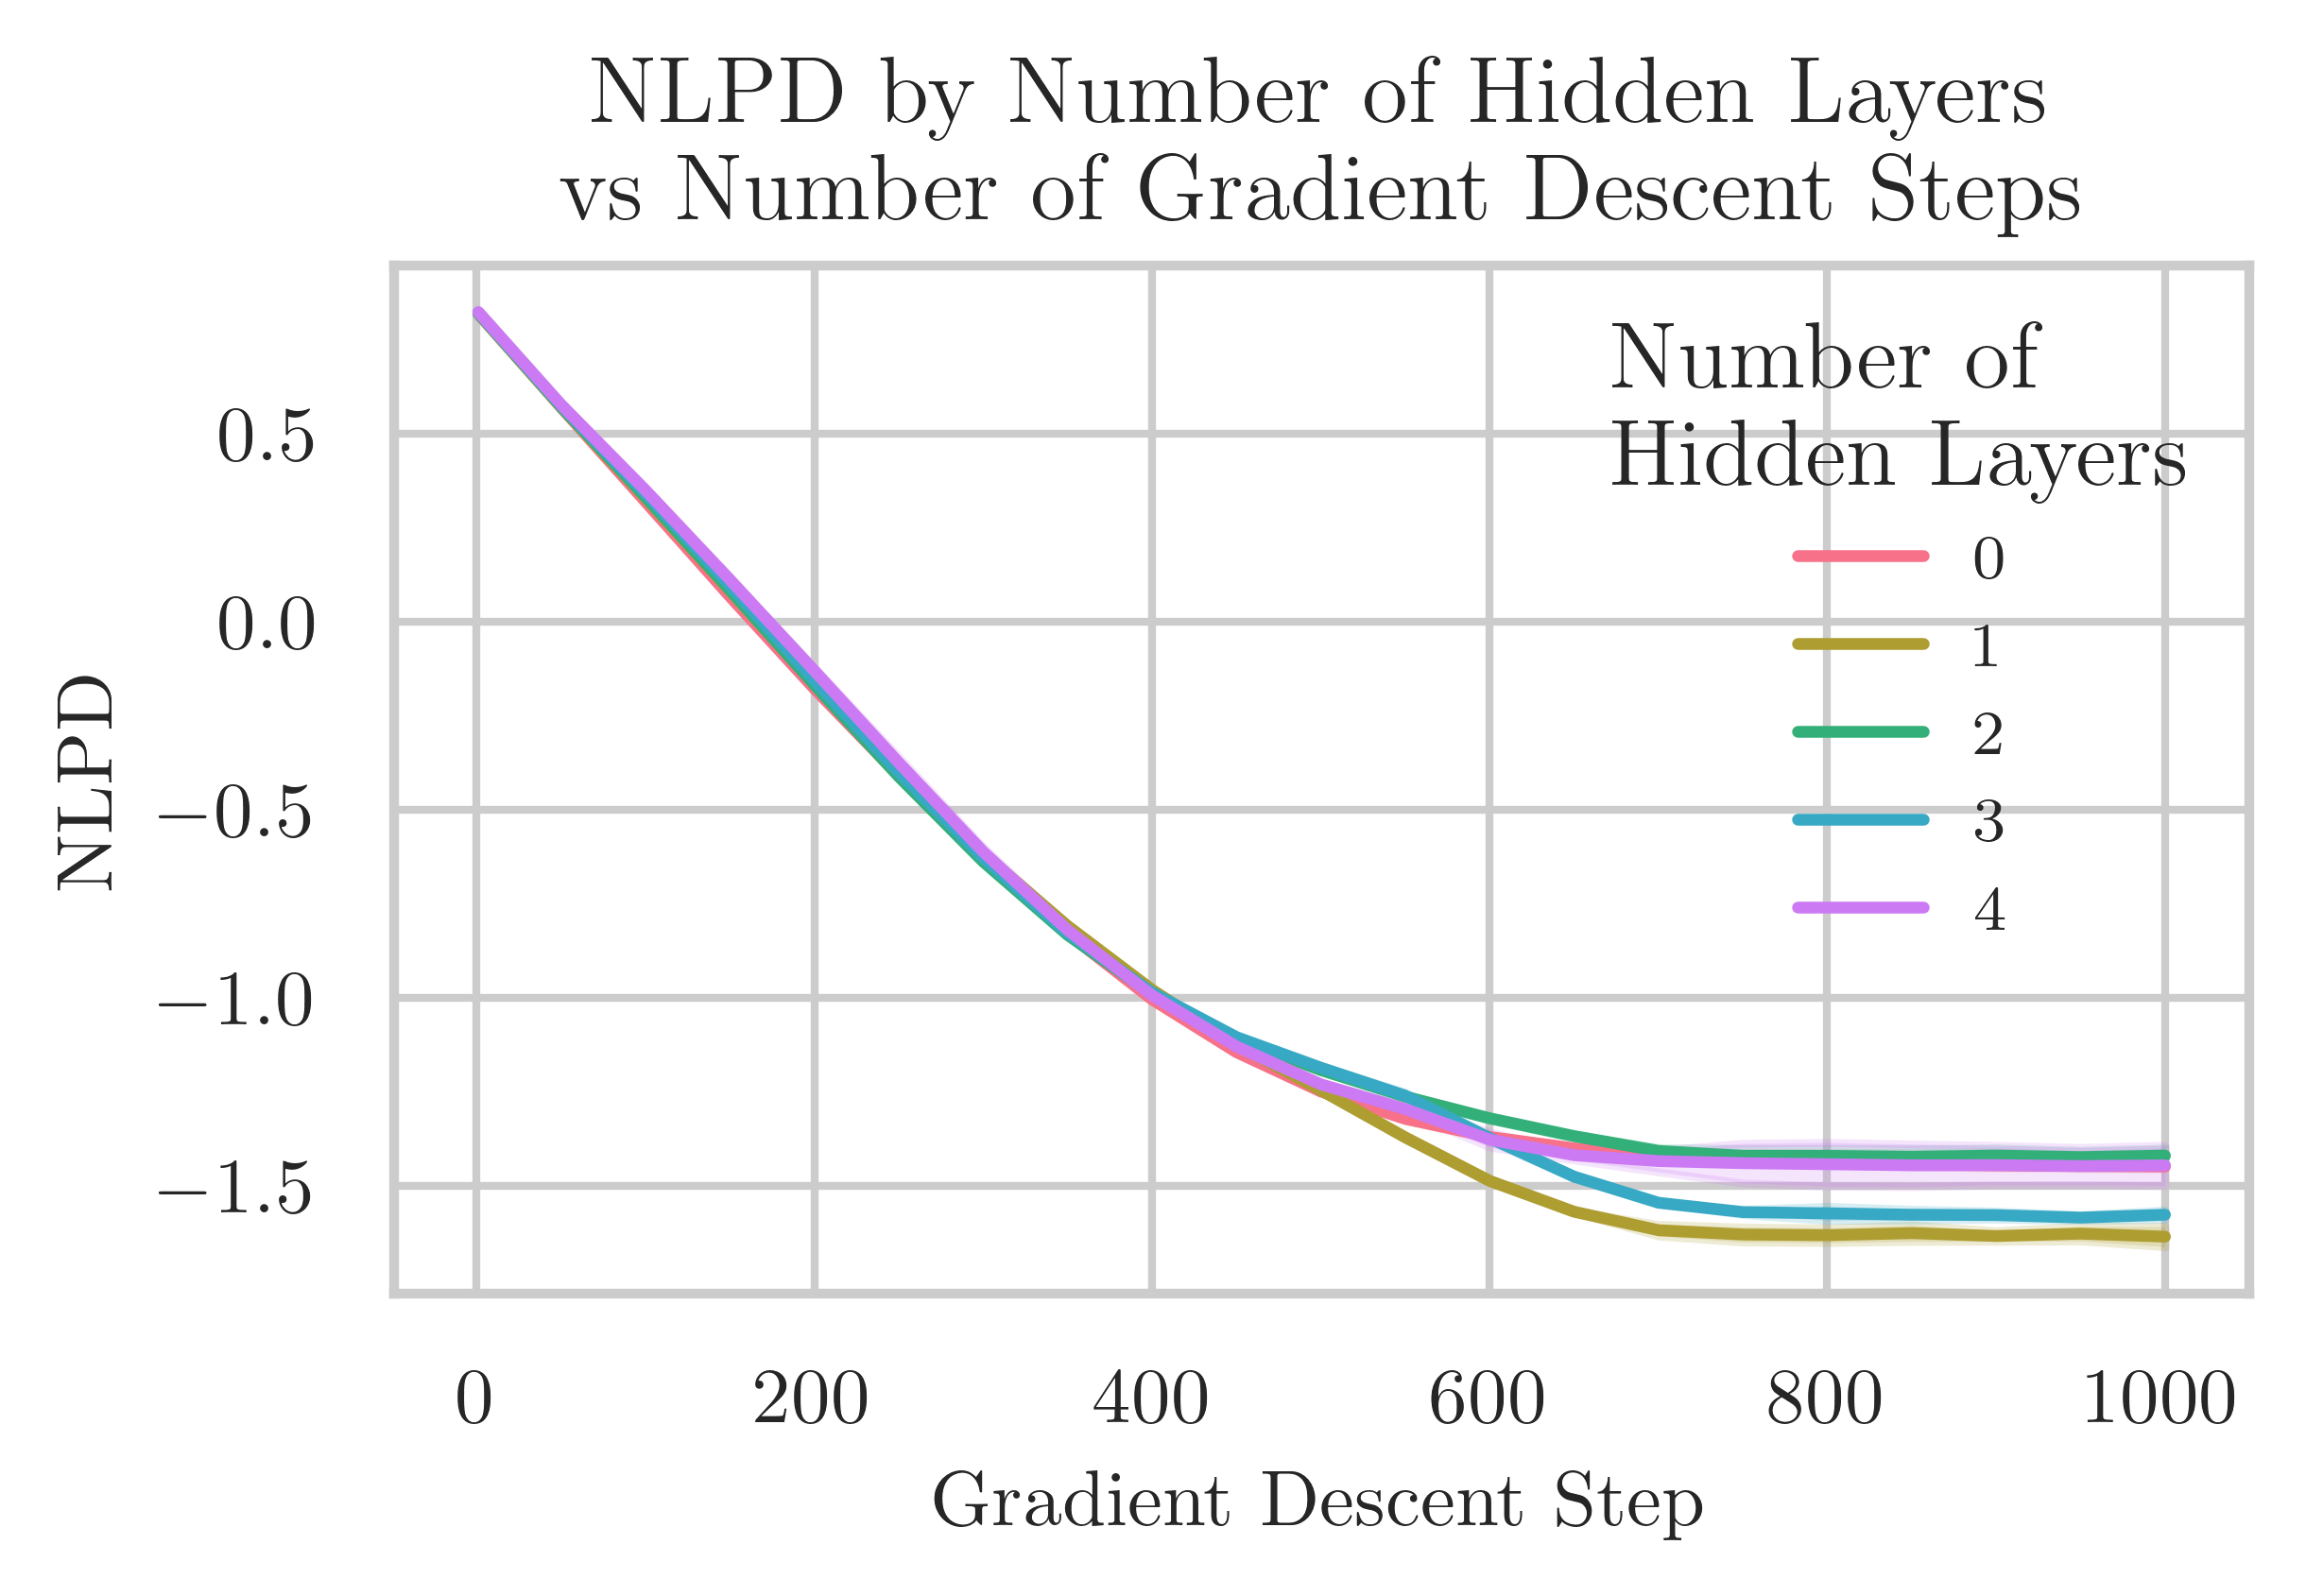

In [17]:
df = data.copy()


num_unique_values = df['num_hidden'].nunique()
# Define a new color palette
palette = sns.color_palette("husl", num_unique_values)



# Create a line plot with error bands representing the standard deviation

fig, ax = plt.subplots()

sns.lineplot(x='step', y='negative_log_predictive_density', hue='num_hidden', palette=palette, data=df[df['outputscale'] == '0.01'], errorbar='sd', ax=ax)



ax.set_title('NLPD by Number of Hidden Layers\nvs Number of Gradient Descent Steps')
plt.legend(title='Number of\nHidden Layers')

ax.set_xlabel('Gradient Descent Step')

ax.set_ylabel('NLPD')

plt.grid(True)
plt.tight_layout()

plt.savefig('../report_plots/nlpd_by_num_hidden_vs_epoch.pdf')
plt.show()

In [119]:
data.to_csv('../experiments/outputscale_vs_layer.csv')

# Test metrics

In [52]:
import pandas as pd 
import os 


def parse_experiment_name(filename): 
    print(filename)
    num_train, model, dataset, num_hidden, outputscale, sample = filename.split('-')
    num_train = num_train.split("=")[1]
    num_hidden = num_hidden.split("=")[1]
    outputscale = outputscale.split("=")[1]
    sample = literal_eval(sample.split("=")[1])
    return num_train, sample, model, dataset, num_hidden, outputscale


root_dir = '../logs/csv/test/'

dfs = []
for experiment_name in os.listdir(root_dir): 
    # exclude performance vs depth experiments 
    if experiment_name.startswith('num_train'):
        parse_name = experiment_name
    elif experiment_name.startswith('naive'): 
        parse_name = 'num_train=400-' + '-'.join(experiment_name.split('-')[1:])
    else: 
        continue 
    if not parse_name.endswith("-sample_hidden='naive'"): 
        parse_name += "-sample_hidden='naive'"

    num_train, sample, model, dataset, num_hidden, outputscale = parse_experiment_name(parse_name)
    experiment_path = os.path.join(root_dir, experiment_name)
    for version in os.listdir(experiment_path):
        experiment_df = pd.DataFrame.from_dict(dict(
            sample=[sample], model=[model], dataset=[dataset], num_hidden=[num_hidden], outputscale=[outputscale], run=[version.split('_')[1]], num_train=[num_train],
        ))
        dir_path = os.path.join(experiment_path, version)
        metrics_df = pd.read_csv(dir_path + "/metrics.csv")
        df = pd.concat([experiment_df, metrics_df], axis=1)
        dfs.append(df)
data = pd.concat(dfs)

num_train=100-geometric_manifold-singular-num_hidden=1-outputscale=0.0001-sample_hidden='naive'
num_train=1600-geometric_manifold-singular-num_hidden=1-outputscale=0.01-sample_hidden='naive'
num_train=400-geometric_manifold-smooth-num_hidden=3-outputscale=0.01-sample_hidden='naive'
num_train=1600-geometric_manifold-singular-num_hidden=2-outputscale=0.0001-sample_hidden='naive'
num_train=200-geometric_manifold-singular-num_hidden=3-outputscale=0.001-sample_hidden='naive'
num_train=400-geometric_manifold-singular-num_hidden=1-outputscale=0.01-sample_hidden='naive'
num_train=200-geometric_manifold-singular-num_hidden=2-outputscale=0.001-sample_hidden='naive'
num_train=400-geometric_manifold-singular-num_hidden=1-outputscale=0.1-sample_hidden='naive'
num_train=100-geometric_manifold-singular-num_hidden=4-outputscale=0.001-sample_hidden='naive'
num_train=1600-geometric_manifold-singular-num_hidden=2-outputscale=0.001-sample_hidden='naive'
num_train=200-geometric_manifold-singular-num_hidden

In [44]:
data['num_hidden'] = data['num_hidden'].astype(int)
data = data[(data['num_hidden'] < 5) & (data['dataset'] == 'singular') & (data['run'].astype(int) < 5)]

In [51]:
from ast import literal_eval 

In [109]:
import plotly.express as px 
import plotly.graph_objects as go

# Create a box plot
df = data[data['num_hidden'] > 0]

fig = px.box(df, y="test-negative_log_predictive_density", x="num_hidden", color="outputscale", hover_data=df.columns)

# Create an empty figure
# fig = go.Figure()

# Add each box trace to the new figure
for trace in fig.data:
    # trace.showlegend=False
    trace.opacity = 0.6
    # fig.add_trace(trace)

# Overlay a scatter plot on top of the box plot
scatter_fig = px.strip(df, y="test-negative_log_predictive_density", x="num_hidden", color="outputscale", hover_data=df.columns)
for trace in scatter_fig.data:
    trace.showlegend=False
    fig.add_trace(trace)

hidden_num_0_mean = data['test-negative_log_predictive_density'][data['num_hidden'] == 0].mean()
fig.add_shape(
    type='line',
    y0=hidden_num_0_mean, y1=hidden_num_0_mean,
    x0=.5, x1=4.5,
    line=dict(
        color='Gray',
        width=2,
        dash="dash",
    ), 
    layer='below',
    name='mean',
    opacity=0.8,
)
fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='lines',
    line=dict(color="Gray", width=2, dash="dash"),
    showlegend=True,
    name='GP Mean',
))

fig.update_layout(
    width=700, 
    height=400, 
    font_family="Serif",
    title=dict(
        text="Negative Log Predictive Density by Hidden Layer Standard Deviation Prior<br>vs Number of Hidden Layers", 
        font_size=20,
        y=0.96
    ),
    legend=dict(
        title="Prior Mean and<br>Standard Deviation", 
        x=1.05, 
        y=0.55,
        yanchor='middle',
    ),
    xaxis_title=dict(
        text="Number of Hidden Layers",
        font_size=16,
    ),
    yaxis_title=dict(
        text="Negative Log Predictive Density", 
        font_size=16, 
    ),
    font_size=14, 
)

fig.show()
fig.write_image('../report_plots/nlpd_vs_num_hidden_layers_and_outputscale.png', scale=6, height=400, width=700)

In [85]:
df = data.copy() 
df[['num_hidden', 'num_train']] = df[['num_hidden', 'num_train']].astype(int)
df = df[df['num_train'].isin({100, 200, 400}) & (df['dataset'] == 'singular') & (df['num_hidden'] < 5)]

In [129]:
fig = make_subplots(
    rows=1, cols=3, x_title="Number of Hidden Layers", y_title="NLPD", 
    column_titles=['100 Training Points', '200 Training Points', '400 Training Points'], 
    shared_yaxes=True, horizontal_spacing=0.01,
)


box_fig = px.box(df[df['num_hidden'] > 0], y="test-negative_log_predictive_density", x="num_hidden", color="outputscale", facet_col='num_train', hover_data=df.columns)

# Add each box trace to the new figure
for trace in box_fig.data:
    trace.opacity = 0.6
    fig.add_trace(trace)

# Overlay a scatter plot on top of the box plot
scatter_fig = px.strip(df[df['num_hidden'] > 0], y="test-negative_log_predictive_density", x="num_hidden", color="outputscale", facet_col='num_train')
for trace in scatter_fig.data:
    trace.showlegend=False
    fig.add_trace(trace)


# Add mean line 
hidden_num_0_mean = df['test-negative_log_predictive_density'][df['num_hidden'] == 0].mean()
for col in range(1, 4):
    fig.add_shape(
        type='line',
        y0=hidden_num_0_mean, y1=hidden_num_0_mean,
        x0=.5, x1=4.5,
        line=dict(
            color='Gray',
            width=1,
            dash="dash",
        ), 
        layer='below',
        name='mean',
        opacity=0.8,
        col=col, row=1
    )
fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='lines',
    line=dict(color="Gray", width=1, dash="dash"),
    showlegend=True,
    name='GP Mean',
))


fig.update_layout(
    font_family="Computer Modern",
    title=dict(
        text="NLPD by Hidden Layer Output Scale Prior vs Number of Hidden Layers",
        y=0.98
        # x=.09
    ),
    legend=dict(
        title="Prior Mean and<br>Standard Deviation", 
        x=1.01, 
        y=0.55,
        yanchor='middle',
    ),
    boxmode='group',
)

# Max width 453
width = 453
ratio = 0.5
height = width * ratio
fig.update_layout(
    width=width,
    height=height,
    title_font_size=12,
    xaxis_title_font_size=10,
    xaxis_tickfont_size=10,
    yaxis_title_font_size=10,
    yaxis_tickfont_size=10,
    legend_font_size=10, 
    legend_title_font_size=10,
    font_size=10,
    xaxis_title_standoff=5,  # Adjust this value for the x-axis title
    yaxis_title_standoff=5,   # Adjust this value for the y-axis title
    legend_tracegroupgap=1,
    margin=dict(b=30, l=30, r=10, t=36),
)
fig.update_annotations(font_size=10)
fig.layout.annotations[3].yshift=-15
fig.layout.annotations[4].xshift=-17
fig.update_traces({'marker':{'size': 3}})
fig.show()
fig.write_image('../report_plots/nlpd_vs_num_hidden_layers_and_outputscale.pdf', scale=6, height=height, width=width)